## **classification of hadwritten digits using MLP**

In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import model_to_dot

## Data loading and Preprocessing 

In [2]:
# loads data and test data sets
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [109]:

first_image  = X_train[5, : , :]

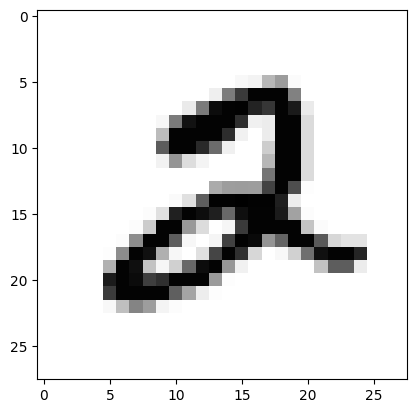

In [110]:
# to interpret the values as 28x28 image, we need to rehape
# numpy array which is one dimensional
plt.imshow(first_image,cmap = plt.cm.Greys);

In [111]:
classes = len(np.unique(y_train))
classes

10

In [112]:
# 60k training 28x28 pixel images
X_train.shape

(60000, 28, 28)

In [113]:
# 10k test 28x88 pixel images
X_test.shape

(10000, 28, 28)

In [114]:
input_dim = np.prod(X_train.shape[1:])
input_dim

784

In [115]:
#the training th test daata sets are integers , ranging from 0 to 255 
# we reshape the training and test data sets to be matrices with 784 (28x28) features
X_train = X_train.reshape(60000, input_dim).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')

In [116]:
# scales the training and test data range to 0 and 1

max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [117]:
# the training and test labels are integers from 0 to 9
(y_train,y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [118]:
# we convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)


## **Multilayer Perceptron**

In [130]:
model= Sequential()
model.add(Dense(512,activation  = 'relu',input_shape = (input_dim,)))
model.add(Dense(400,activation  = 'relu'))
model.add(Dense(300,activation  = 'relu'))
model.add(Dense(200,activation  = 'relu'))
model.add(Dense(100,activation  = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

In [132]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 512)               401920    
                                                                 
 dense_155 (Dense)           (None, 400)               205200    
                                                                 
 dense_156 (Dense)           (None, 300)               120300    
                                                                 
 dense_157 (Dense)           (None, 200)               60200     
                                                                 
 dense_158 (Dense)           (None, 100)               20100     
                                                                 
 dense_159 (Dense)           (None, 10)                1010      
                                                                 
Total params: 808,730
Trainable params: 808,730
Non-t

In [121]:

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## **Train Classifier**

In [133]:
# trains the model, iterating on the training the batches between
#using adam optimizer here
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [134]:
model.fit(X_train,y_train,batch_size = 40, epochs = 4,verbose =1)

Epoch 1/4
1500/1500 [==============================] - 21s 13ms/step - loss: 0.2218 - accuracy: 0.9334
Epoch 2/4
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 3/4
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0740 - accuracy: 0.9784
Epoch 4/4
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0595 - accuracy: 0.9828


In [136]:
# model gives ~98% accuracy
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9760


[0.09830419719219208, 0.9760000109672546]

## **predicting couple of held out images**

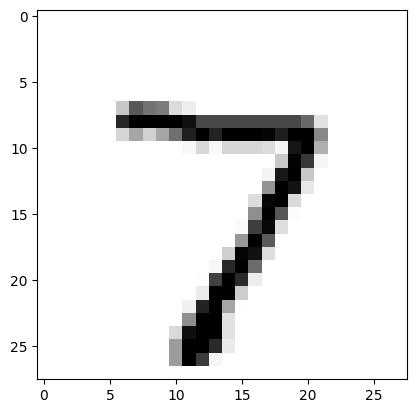

In [142]:
first_test_image = X_test[0,:]
plt.imshow(first_test_image.reshape(28,28),cmap = plt.cm.Greys);


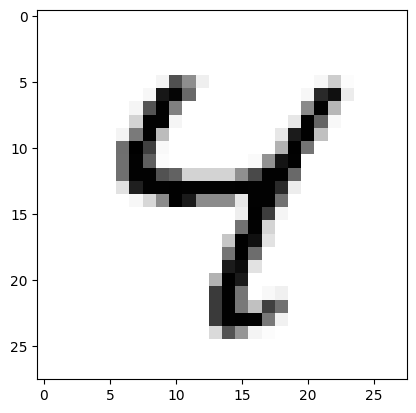

In [152]:
second_test_image = X_test[6,:]
plt.imshow(second_test_image.reshape(28,28),cmap = plt.cm.Greys);

In [156]:
np.argmax(model.predict(X_test[[6],:])).astype('int32')

1/1 [==============================] - 0s 34ms/step


4